# Семинар: Градиентный спуск. Задачи

In [ ]:
from typing import Iterable, List
import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск

Функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Можно показать, что для линейной модели, функционал ошибки можно записать в матричном виде следующим образом:
$$
Q(w, X, y) =\frac{1}{l} (y - Xw)^T(y-Xw)
$$
или
$$
Q(w, X, y) = \frac{1}{l} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{l} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших функционалов ошибки (= функций потерь = лоссов). Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения функционала ошибки
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [ ]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Реализация этого абстрактного класса: Mean Squared Error лосс.

**Задание 1.1:** __Реализуйте класс `MSELoss`__

Он должен вычислять значение функционала ошибки (лосс) $
Q(w, X, y)$ и его градиент $\nabla_w Q(w, X, y)$ по формулам (выше)
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$
$$
\nabla_w Q(w, X, y) = \frac{2}{l} X^T(Xw-y)
$$

In [ ]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        return np.mean((X.dot(w) - y)**2) # реализация формулы, написанной выше. X.dot(w) - матричное умножение


    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        return (2/len(y)) * X.T.dot(X.dot(w) - y) # градиент по фомуле выше


Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашего функционала ошибки и градиент:

In [ ]:
# Создадим объект лосса
loss = MSELoss()

# Создадим датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим вектор весов
w = np.arange(10)

#print(X)
#print(y)
#print(w)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Для вычисления градиента все готово, реализуем градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2:** __Реализуйте функцию `gradient_descent`__

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`,
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором осуществляется шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать
траекторию спуска (список из новых значений весов на каждом шаге)

In [ ]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
)-> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    weights = [] # список, в который будем записывать значения полученных весов
    weights.append(w_init) # добавим исходное значение веса
    w = weights[0] # это исходное значение понадобится нам в первой итерации
    for i in range(n_iterations): # кол-во итераций
      grad = loss.calc_grad(X, y, w) # считаем радиент с помощью функции, написанной выше
      w = w - lr*grad # меняем значение веса w соглансо формуле одной итерации град. спуска
      weights.append(w) # наполняем список весов
    return weights


Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории.  
(Если не оговорено иное, то в задачах используются указанные параметры `n_features,
n_objects, batch_size, num_steps`).


In [ ]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2 # кол-во признаков
n_objects = 300 # кол-во объектов
batch_size = 10 # кол-во примеров (объектов). Пока не используется
num_steps = 43 # кол-во шагов

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [ ]:
loss = MSELoss() # для данного класа выше мы писали методы calc_lpss и calc_grad
w_list = gradient_descent(w_init, X, y, loss, 0.01, num_steps) # получаем список весов после применения метода градиентного спуска
print(loss.calc_loss(X, y, w_list[0])) # первое (исходное) значение веса
print(loss.calc_loss(X, y, w_list[-1])) # последнее значение веса

425.58917680450253
0.8670719772817392


In [ ]:
w_init # первоначальный вес (генерили его выше)

array([0.62074297, 1.79288146])

In [ ]:
w_list # полный список весов по всем итерациям

[array([0.62074297, 1.79288146]),
 array([ 0.44735749, -1.8304003 ]),
 array([0.26091556, 0.31793598]),
 array([ 0.12674895, -0.95904084]),
 array([-0.00077067, -0.20269022]),
 array([-0.10035868, -0.65294595]),
 array([-0.18955348, -0.38683404]),
 array([-0.26209584, -0.54573687]),
 array([-0.32521258, -0.45223178]),
 array([-0.3775857 , -0.50841489]),
 array([-0.42251159, -0.47564759]),
 array([-0.46016098, -0.49558625]),
 array([-0.49223243, -0.4841667 ]),
 array([-0.51924072, -0.4912955 ]),
 array([-0.54216889, -0.48736123]),
 array([-0.56152377, -0.48994757]),
 array([-0.57792705, -0.48862505]),
 array([-0.59179029, -0.48958987]),
 array([-0.60352966, -0.48916939]),
 array([-0.61345697, -0.48954772]),
 array([-0.62185998, -0.48943211]),
 array([-0.62896794, -0.48959291]),
 array([-0.6349833 , -0.48957547]),
 array([-0.64007231, -0.48965182]),
 array([-0.64437863, -0.48966234]),
 array([-0.64802204, -0.48970334]),
 array([-0.65110494, -0.48971898]),
 array([-0.65371336, -0.48974352

In [ ]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list) # преобразовали в np.array()
    meshgrid_space = np.linspace(-2, 2, 100) #одномерный массив значений от -2 до 2 с 100 равными интервалами, используя функцию linspace из библиотеки NumPy.
  #используется для создания равномерно распределенной сетки значений для последующего использования в графикаx
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)
    #созданеи двумерных массивов (A) и (B) на основе значений, заданных в массиве meshgrid_space.

    levels = np.empty_like(A) # пустой массив levels, имеющй такие же размеры как и массивы A и B
    for i in range(A.shape[0]): # пока i в иньервале от 0 до (кол-во строк А - 1)
        for j in range(A.shape[1]): # пока j в иньервале от 0 до (кол-во столбцов А - 1)
            w_tmp = np.array([A[i, j], B[i, j]]) # берем все элементы A и B и записываем их в массив
            levels[i, j] = loss.calc_loss(X, y, w_tmp) # расчет ошибки с помощью функции loss.calc_loss для этих координат и сохранение результата в соответствующем элементе массива levels.

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3:** __При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`)__. Используйте не менее четырёх разных значений для `lr`. Для каждой длины шага вычисляйтете значение функционала ошибки при помощи метода `calc_loss` на первой и последней итерациях градиентного спуска.

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

425.58917680450253
372.6651001331268
Грфик для lr=1e-05


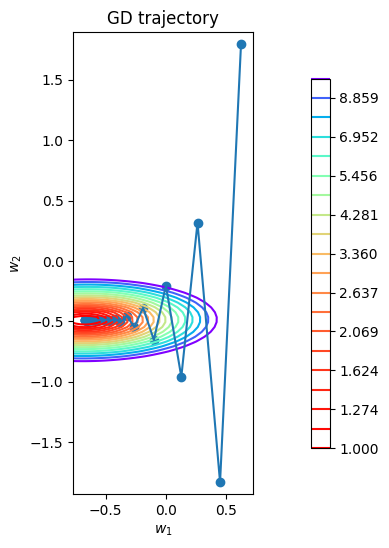

425.58917680450253
2.486179167609785e+81
Грфик для lr=0.058


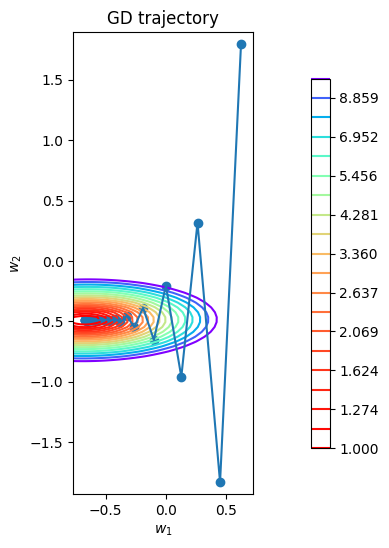

425.58917680450253
4.32614071157945
Грфик для lr=0.001


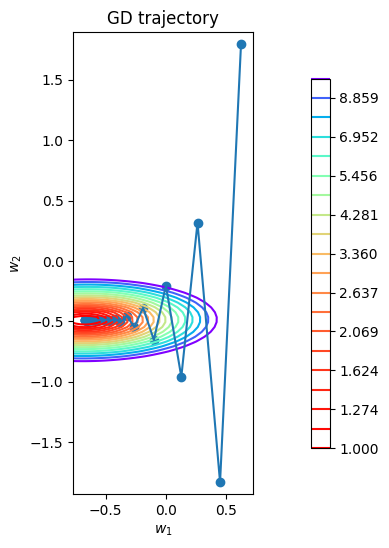

425.58917680450253
0.8670719772817392
Грфик для lr=0.01


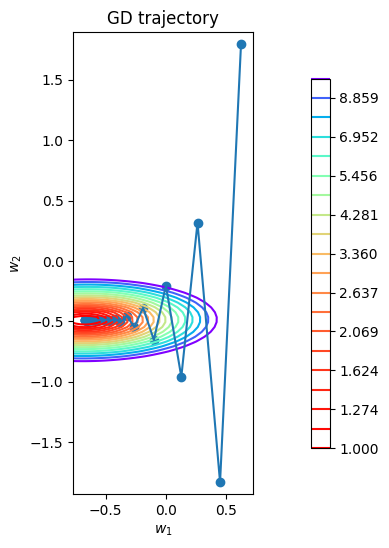

425.58917680450253
3.953433947960349e+103
Грфик для lr=0.1


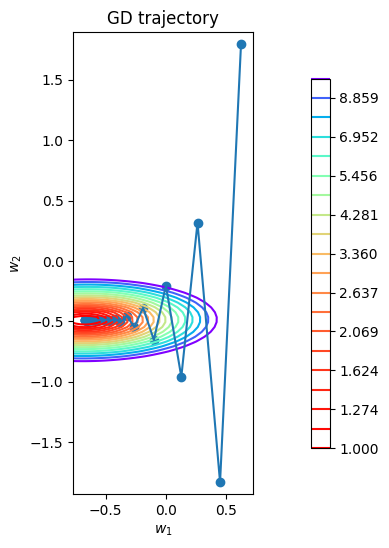

In [ ]:
lrs = [0.00001, 0.058, 0.001, 0.01, 0.1] # значения шагов
# loss = MSELoss()
for lr in lrs:
  ws = gradient_descent(w_init, X, y, loss, lr, num_steps) # список весов
  print(loss.calc_loss(X, y, ws[0])) # изначальное значение веса
  print(loss.calc_loss(X, y, ws[-1])) # значение веса на последней итерации
  print(f"Грфик для lr={lr}")
  plot_gd(w_list, X, y, loss)

Поскольку графики получились одинаковые, будем опираться на последнюю ошибку.

Маленькое значение lr (недообучение): При слишком маленьком значении lr алгоритм может сходиться медленно и требовать большого числа итераций для достижения оптимальных значений. Значение функционала ошибки на первой и последней итерациях будет высоким.
Слишком большое значение lr (расходимость): При слишком большом значении lr алгоритм может расходиться, то есть значения функционала ошибки могут начать сначала возрастать после некоторого числа итераций.
Умеренное значение lr (оптимальное обучение): Умеренное значение lr обычно позволяет алгоритму сходиться достаточно быстро, не приводя к расходимости. Значение функционала ошибки на первой и последней итерациях будет сравнительно низким.

Изначальное значение ошибки в каждом эксперименте состяавялет 425.58917680450253.

##Грaфик для lr=10e-5

**372.6651001331268**

При длине шага lr=10e-5 мы получили достаточно большую ошибку и на последнем шаге - 372.6651001331268. То есть длина шага оказаась слишком маленькой, мы не дошли до возможного минимума. Для того, чтобы при таком шаге доситься дейтсвительно хороших резулььаьов нужжно увеличить кол-во шагов, но это может быть очень затратно по врмени и вычсилительным ресурсам.

##Грaфик для lr=0.058

**2.486179167609785e+81**

При длине шага почти lr = 0.06 результаты еще хуже из-за того, что двигаемся мы намного быстрее. То есть с такми шагом мы просто перескочили через минимум и ушли очень далеко


##Грaфик для lr=0.001

**4.32614071157945**

При данной длине шага получаем результат намного лучше. Длина шага хорошая, так как мы и не перескакиваем через искомый минимум, и не получется тк, что они слишком маленькая и мы вообще сильно не доходим.

##Грaфик для lr=0.01

**0.8670719772817392**

Эта длинна шага является наилучшей из тех, которые я рассматривала. Ошибка наименьшая.


##Грaфик для lr=0.1

**3.953433947960349e+103**

Ну и наихудшим шагом будет lr=0.1, так как ошибка при данном шаге самая огромная (аж 103 степень...)




Теперь реализуем стохастический градиентный спуск

**Задание 1.4:** __Реализуйте функцию `stochastic_gradient_descent`__

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча.

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

(*здесь np.random.choice генерирует из np.arange(X.shape[0]), длина size,
replace=False - без повторения*)

In [ ]:
np.random.seed(1337)

In [ ]:
X.shape[0]

300

In [ ]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False) # выбирали слоучайные индексы и элементы по этим случ. индексам
    batch = X[batch_indices] # элементы X по данным индексам
    y_batch = y[batch_indices] # берем именно те элементы из y, индексы которых выбрали выше
    weights = [] # список, в который будеи записывать значения полученных весов
    weights.append(w_init) # добавим исхожное начение веса
    w = weights[0] # это исходное значение понадобится нам в первой итерации
    grad = (2/len(y_batch)) * batch.T.dot(batch.dot(w) - y_batch)

    for i in range(n_iterations): # кол-во итераций
      grad = loss.calc_grad(batch, y_batch, w) # считаем радиент с помощью функции, написанной выше
      w = w - lr*grad # меняем значение веса w соглансо формуле одной итерации град. спуска
      weights.append(w) #заполняем список массивов np.array для весов
    return np.array(weights)




In [ ]:
# loss = MSELoss()
w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.01, batch_size, num_steps)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
2.9045868049310033


**Задание 1.5:** __При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`)__. Используйте не менее трех разных значений для `lr` и `batch_size`. (Для каждых длины шага и размера подвыборки вычисляйтете значение функционала ошибки при помощи метода `calc_loss` на первой и последней итерациях стохастического градиентного спуска).

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

Длина шага: 1e-05
Размер выборки: 10
Размер функционала ошибки на первой итерации: 425.58917680450253
Размер функционала ошибки на последней итерации: 383.6980334348404


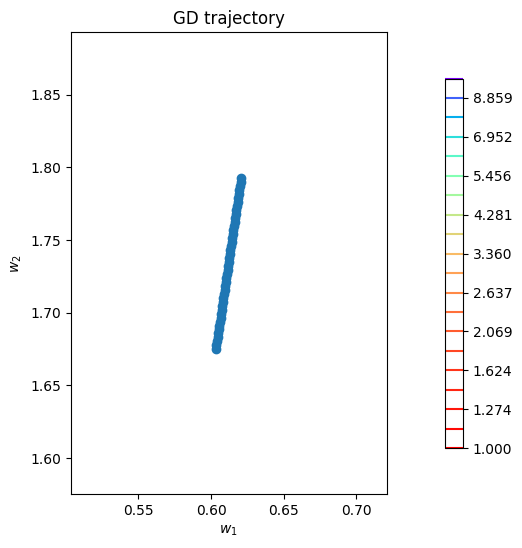

Длина шага: 1e-05
Размер выборки: 50
Размер функционала ошибки на первой итерации: 425.58917680450253
Размер функционала ошибки на последней итерации: 370.5750609510569


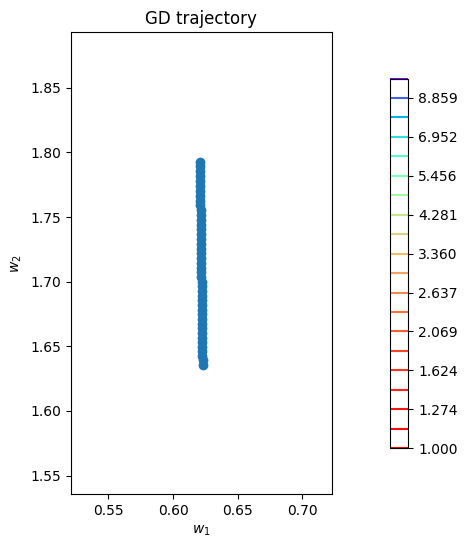

Длина шага: 1e-05
Размер выборки: 100
Размер функционала ошибки на первой итерации: 425.58917680450253
Размер функционала ошибки на последней итерации: 379.4525718771098


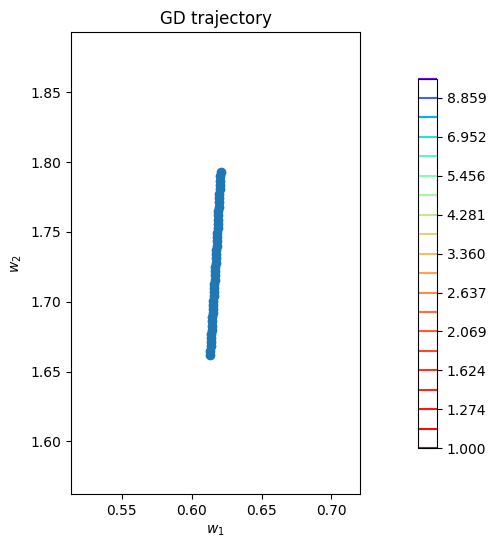

Длина шага: 0.001
Размер выборки: 10
Размер функционала ошибки на первой итерации: 425.58917680450253
Размер функционала ошибки на последней итерации: 15.911021922735827


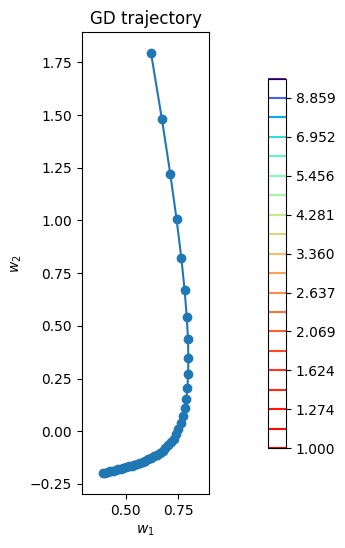

Длина шага: 0.001
Размер выборки: 50
Размер функционала ошибки на первой итерации: 425.58917680450253
Размер функционала ошибки на последней итерации: 5.116554652710881


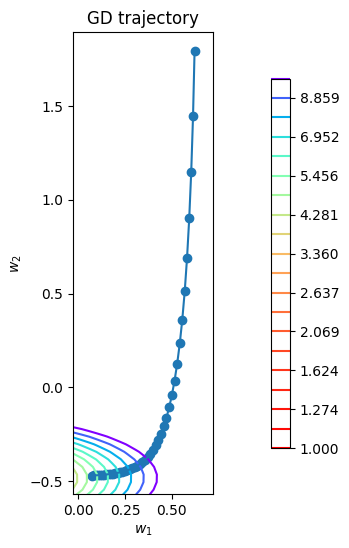

Длина шага: 0.001
Размер выборки: 100
Размер функционала ошибки на первой итерации: 425.58917680450253
Размер функционала ошибки на последней итерации: 4.411167117060535


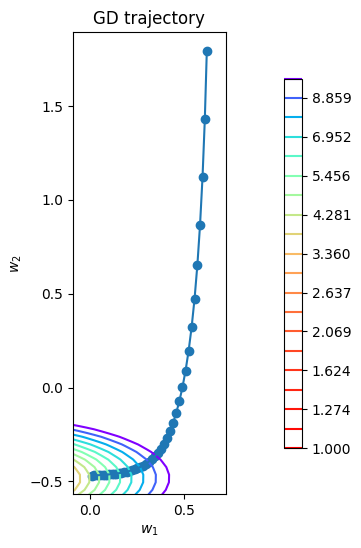

Длина шага: 0.01
Размер выборки: 10
Размер функционала ошибки на первой итерации: 425.58917680450253
Размер функционала ошибки на последней итерации: 1.0859477316547093


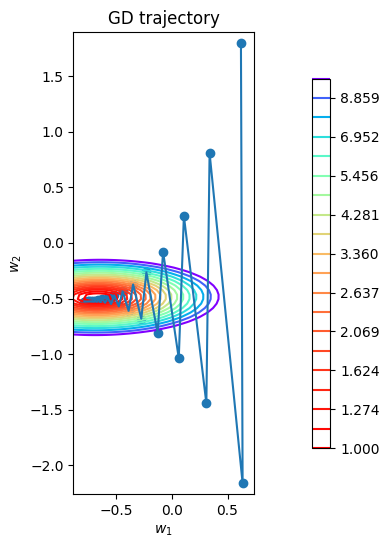

Длина шага: 0.01
Размер выборки: 50
Размер функционала ошибки на первой итерации: 425.58917680450253
Размер функционала ошибки на последней итерации: 0.8832597140406083


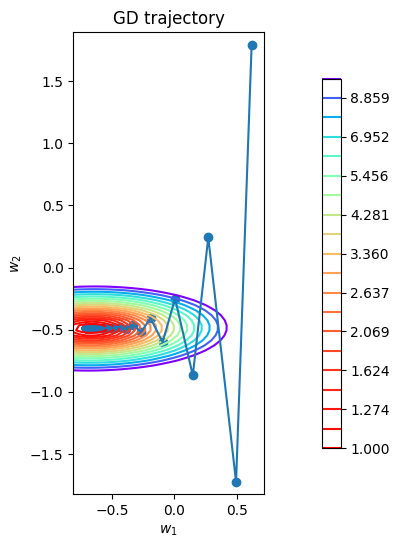

Длина шага: 0.01
Размер выборки: 100
Размер функционала ошибки на первой итерации: 425.58917680450253
Размер функционала ошибки на последней итерации: 0.8944081459733597


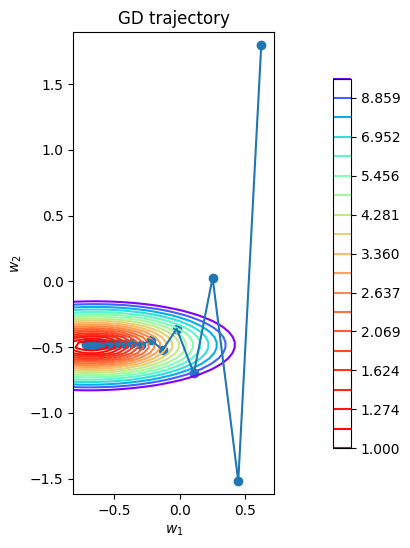

In [ ]:
lrs=[0.00001, 0.001, 0.01] # длины шага
batch_sizes = [10, 50, 100] # размер батча
loss = MSELoss()

for lr in lrs:
  for batch_size in batch_sizes:
    print(f"Длина шага: {lr}")
    print(f"Размер выборки: {batch_size}")
    w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, num_steps)
    print(f"Размер функционала ошибки на первой итерации: {loss.calc_loss(X, y, w_list[0])}")
    print(f"Размер функционала ошибки на последней итерации: {loss.calc_loss(X, y, w_list[-1])}")
    plot_gd(w_list, X, y, loss)



Рассмотрела 9 разных комбинаций длины шага и размера выборки (кол-во объектов)

lrs=[0.00001, 0.001, 0.01]

batch_sizes = [10, 50, 100]

При lr = 10e-5 мы во всех трех случаях (при всех трех заданный значениях batch_size) получаем примерно одинаковые ошибки - 374.7615896085845, 374.1284675568400, 370.48400762964445. Опять же все дело в том, что мы используем слишком маленький шаг и поэтому ошибка не сильно уменьшается по сравнению в изначальной. И эта ошибка при данном размере шага не сильно зависит от размера батча (единственное - ошибка конечно уменьшаетя при увеличении раземра батча, но не сильно)

При lr = 10e-3 картина уже намного лучше:

Ошибка при batch_sive = 10 равна 2.832342616703343

Ошибка при batch_sive = 50 равна 3.7128530307162175

Ошибка при batch_sive = 100 равна 4.370567985769585

То есть для шага lr = 10e-3 чем меньше размер выборки, тем лучше результат нашей модели.

При lr = 0.01:

Ошибка при batch_sive = 10 равна 0.8803747544670812

Ошибка при batch_sive = 50 равна 0.8936130404199875

Ошибка при batch_sive = 100 равна 0.8998150909705994

То есть для нашей выборки, чтобы получить наименьшую ошибку лучше всего использовать lr = 0.01 и batch_sive = 10.

Можно заметить, что поведение градиентного спуска, особенно его стохастической версии, очень сильно зависит от размера шага.

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его.

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6:** __Реализуйте функцию `stochastic_gradient_descent` с затухающим шагом по формуле выше__. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [ ]:
def stochastic_gradient_descent_n(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False) # выбирали слоучайные индексы и элементы по этим случ. индексам
    batch = X[batch_indices] # элементы X по данным индексам
    y_batch = y[batch_indices]  # берем именно те элементы из y, индексы которых выбрали выше
    weights = [] # список, в который будеи записывать значения полученных весов
    weights.append(w_init) # добавим исхожное начение веса
    w = weights[0] # это исходное значение понадобится нам в первой итерации
    grad = (2/len(y_batch)) * batch.T.dot(batch.dot(w) - y_batch)

    for i in range(n_iterations): # кол-во итераций
      lr_n = lr*pow((1/1+i),p) # реализация формулы, написанной выше. pow - возведение первого аргумента данной функции в степень, равную второму аргуементу
      grad = loss.calc_grad(batch, y_batch, w) # считаем радиент с помощью функции, написанной выше
      w = w - lr_n*grad # меняем значение веса w соглансо формуле одной итерации град. спуска
      weights.append(w) #заполняем список массивов np.array для весов
    return np.array(weights)




In [ ]:
loss = MSELoss()
p = 0.3
w_list = stochastic_gradient_descent_n(w_init, X, y, loss, lr, batch_size, p, num_steps)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))


425.58917680450253
2.8858391670640856e+37


**Задание 1.7:** __При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`__. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10. (Для каждого значения параметра `p` вычисляйтете значение функционала ошибки при помощи метода `calc_loss` на первой и последней итерациях стохастического градиентного спуска).

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

Параметр p: 0.1
Размер функционала ошибки на первой итерации: 425.58917680450253
Размер функционала ошибки на последней итерации: 62.29075606396879


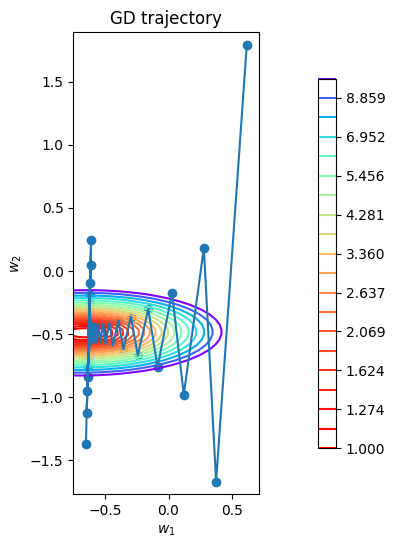

Параметр p: 0.14
Размер функционала ошибки на первой итерации: 425.58917680450253
Размер функционала ошибки на последней итерации: 450020815.6445968


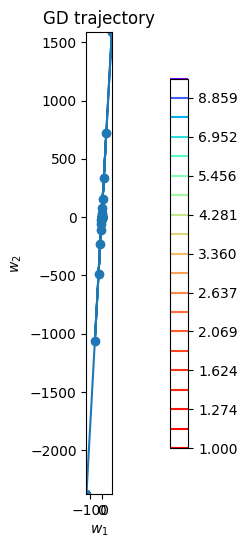

Параметр p: 0.25
Размер функционала ошибки на первой итерации: 425.58917680450253
Размер функционала ошибки на последней итерации: 8.492314969632267e+39


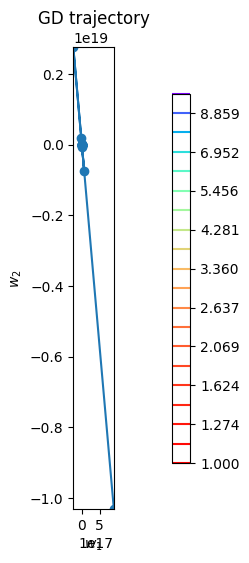

Параметр p: 0.5
Размер функционала ошибки на первой итерации: 425.58917680450253
Размер функционала ошибки на последней итерации: 5.020476500663309e+66


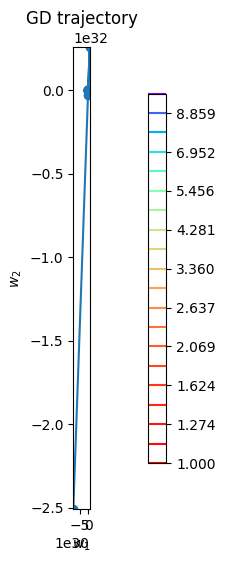

In [ ]:
ps = [0.1, 0.14, 0.25, 0.5]
batch_size = 10
lr = 0.01

for p in ps:
  print(f"Параметр p: {p}")
  w_list = stochastic_gradient_descent_n(w_init, X, y, loss, lr, batch_size, p, num_steps)
  print(f"Размер функционала ошибки на первой итерации: {loss.calc_loss(X, y, w_list[0])}")
  print(f"Размер функционала ошибки на последней итерации: {loss.calc_loss(X, y, w_list[-1])}")
  plot_gd(w_list, X, y, loss)




При p = 0.1 получили наименьшую ошибку. Она не сильно отличается от исходной. В остальных случаях ошибка силно взлетает.

**Задание 1.8:** __Сравните сходимость обычного градиентного спуска и его стохастической версии__:
Нарисуйте график зависимости значения функционала ошибки (лосса) (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска __с одинаковыми параметрами__. В SGD параметр `batch_size` возьмите равным 10, `p=0`.


In [ ]:
print(n_features)
print(n_objects)
print(batch_size)
print(num_steps)

2
300
10
43


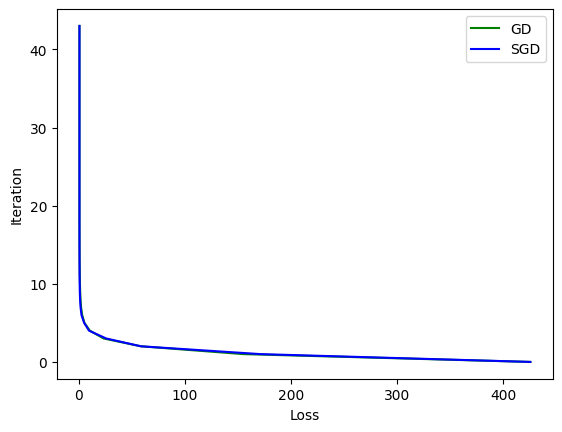

In [ ]:
batch_size = 10
p = 0
gd_w_list = gradient_descent(w_init, X, y, loss, lr, num_steps) # список весов при обычном градиентном спупке
sgd_w_list = stochastic_gradient_descent_n(w_init, X, y, loss, lr, batch_size, p, num_steps) # список весов при стохастическом градиентном спупке
gd_loss = [] # сюда будем записывать ошибки при ГД
sgd_loss = [] # сюда будем записывать ошибки при СГД
val = [] # значения по y (кол-во итераций)

for i in range(0, num_steps + 1): # заданное кол-во шагов
  gd_loss.append(loss.calc_loss(X, y, gd_w_list[i])) # ошибка при ГД
  sgd_loss.append(loss.calc_loss(X, y, sgd_w_list[i])) # ошибка при СГД
  val.append(i)

plt.plot(gd_loss, val, label='GD', color = 'green') # зависимость функци ошибки (потерь) от номера итерации
plt.plot(sgd_loss, val, label='SGD', color = 'Blue')
plt.legend()
plt.xlabel('Loss')
plt.ylabel('Iteration')
plt.show()



Запуская построение графика каждый раз мы получаем разыне реузльтаты. Дело в том, что в СГД берутся случайные элементы из всех объектов, поэтому на одних объектах мы получаем более точные результаты, а на других менее точные.